In [1]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import os

# # Parameters
# L = 0.24  # Wall thickness in meters (240mm)
# W = 1.0   # Wall width in meters (1000mm)
# alpha = 2.5e-6  # Thermal diffusivity in m^2/s
# T0 = 20   # Temperature at x=0 in Celsius
# TL = 40   # Temperature at x=L in Celsius
# Ti = 25   # Initial average temperature in Celsius

# # Time and space grids
# x = np.linspace(0, L, 100)  # Space grid along wall thickness
# t = np.linspace(0, 3600*24, 200)  # Time grid up to 1 day

# # Initialize temperature data storage
# TemperatureData = np.zeros((len(t), len(x)))

# # Compute temperature distribution
# N = 10  # Number of Fourier series terms
# for k in range(len(t)):
#     Temperature = T0 + (TL - T0) * x / L
#     for n in range(1, N+1):
#         Bn = 2/(n*np.pi) * ((-1)**n - 1) * (TL - T0 - (Ti - T0)) / L
#         Temperature += Bn * np.sin(n * np.pi * x / L) * np.exp(-alpha * (n * np.pi / L)**2 * t[k])
#     TemperatureData[k, :] = Temperature

# # Create dataset for KAN
# x_data = np.array([[x_val, t_val] for t_val in t for x_val in x])
# y_data = TemperatureData.flatten()

# x_tensor = torch.tensor(x_data, dtype=torch.float32)
# y_tensor = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)

# # Split dataset into training and test sets
# train_size = int(0.8 * len(x_tensor))
# test_size = len(x_tensor) - train_size
# train_input, test_input = torch.split(x_tensor, [train_size, test_size])
# train_label, test_label = torch.split(y_tensor, [train_size, test_size])

# # Create the dataset dictionary as expected by KAN
# dataset = {
#     'train_input': train_input,
#     'train_label': train_label,
#     'test_input': test_input,
#     'test_label': test_label
# }

# # Initialize KAN
# from kan import KAN  # Ensure you have the kan module available

# model = KAN(width=[2, 5, 1], grid=5, k=3, seed=0)

# # Plot KAN at initialization
# model(dataset['train_input'])
# model.plot(beta=100)

# # Train KAN with sparsity regularization
# model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.)

# # Plot trained KAN
# model.plot()

# # Prune KAN and replot (keep the original shape)
# model.prune()
# model.plot(mask=True)

# # Prune KAN and replot (get a smaller shape)
# model = model.prune()
# model(dataset['train_input'])
# model.plot()

# # Continue training and replot
# model.train(dataset, opt="LBFGS", steps=50)
# model.plot()

# # Automatically set activation functions to be symbolic
# # lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
# lib = ['x', 'sin', 'exp', 'x^2', 'x^3']
# model.auto_symbolic(lib=lib)

# # Continue training to almost machine precision
# model.train(dataset, opt="LBFGS", steps=50)

# # Obtain the symbolic formula
# symbolic_formula = model.symbolic_formula()[0][0]
# print(symbolic_formula)

# # Create output directory for plots
# outputDir = 'TemperaturePlots'
# if not os.path.exists(outputDir):
#     os.makedirs(outputDir)

# # Plot predicted temperature distribution
# predicted_temperature = model(x_tensor).detach().numpy().reshape(len(t), len(x))

# fig, ax = plt.subplots()
# cax = ax.imshow(np.tile(predicted_temperature[0, :], (100, 1)), aspect='auto', cmap='RdGy', vmin=15, vmax=45)
# fig.colorbar(cax)
# ax.set_xlabel('Thickness (mm)')
# ax.set_ylabel('Width (mm)')
# ax.set_title(f'Predicted Temperature Distribution at t = {t[0]} s')

# def update_pred(frame):
#     ax.clear()
#     cax = ax.imshow(np.tile(predicted_temperature[frame, :], (100, 1)), aspect='auto', cmap='RdGy', vmin=15, vmax=45)
#     ax.set_xlabel('Thickness (mm)')
#     ax.set_ylabel('Width (mm)')
#     ax.set_title(f'Predicted Temperature Distribution at t = {t[frame]} s')

# ani_pred = FuncAnimation(fig, update_pred, frames=len(t), repeat=False)
# ani_pred.save(f'{outputDir}/PredictedTemperatureAnimation.gif', writer='imagemagick', fps=10)

# plt.show()


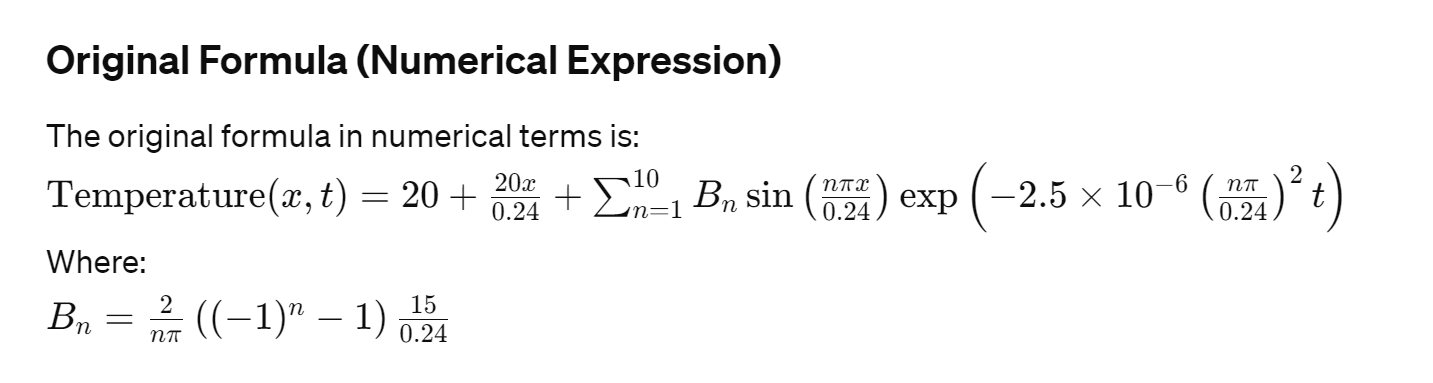

In [2]:
# import numpy as np
# import torch
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import os
# from kan import KAN  # Ensure you have the kan module available

# # Parameters
# L = 0.24  # Wall thickness in meters (240mm)
# W = 1.0   # Wall width in meters (1000mm)
# alpha = 2.5e-6  # Thermal diffusivity in m^2/s
# T0 = 20   # Temperature at x=0 in Celsius
# TL = 40   # Temperature at x=L in Celsius
# Ti = 25   # Initial average temperature in Celsius

# # Time and space grids
# x = np.linspace(0, L, 100)  # Space grid along wall thickness
# t = np.linspace(0, 3600*24, 200)  # Time grid up to 1 day

# # Initialize temperature data storage
# TemperatureData = np.zeros((len(t), len(x)))

# # Compute temperature distribution
# N = 10  # Number of Fourier series terms
# for k in range(len(t)):
#     Temperature = T0 + (TL - T0) * x / L
#     for n in range(1, N+1):
#         Bn = 2/(n*np.pi) * ((-1)**n - 1) * (TL - T0 - (Ti - T0)) / L
#         Temperature += Bn * np.sin(n * np.pi * x / L) * np.exp(-alpha * (n * np.pi / L)**2 * t[k])
#     TemperatureData[k, :] = Temperature

# # Create dataset for KAN
# x_data = np.array([[x_val, t_val] for t_val in t for x_val in x])
# y_data = TemperatureData.flatten()

# x_tensor = torch.tensor(x_data, dtype=torch.float32)
# y_tensor = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)

# # Split dataset into training and test sets
# train_size = int(0.8 * len(x_tensor))
# test_size = len(x_tensor) - train_size
# train_input, test_input = torch.split(x_tensor, [train_size, test_size])
# train_label, test_label = torch.split(y_tensor, [train_size, test_size])

# # Create the dataset dictionary as expected by KAN
# dataset = {
#     'train_input': train_input,
#     'train_label': train_label,
#     'test_input': test_input,
#     'test_label': test_label
# }

# # Initialize KAN with adjusted parameters
# model = KAN(width=[2, 10, 1], grid=10, k=3, seed=0)  # Increase hidden neurons and grid size

# # Plot KAN at initialization
# model(dataset['train_input'])
# model.plot(beta=100)

# # Train KAN with sparsity regularization
# model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.0)

# # Plot trained KAN
# model.plot()

# # Prune KAN and replot (keep the original shape)
# model.prune()
# model.plot(mask=True)

# # Prune KAN and replot (get a smaller shape)
# model = model.prune()
# model(dataset['train_input'])
# model.plot()

# # Continue training and replot
# model.train(dataset, opt="LBFGS", steps=50)
# model.plot()

# # Automatically set activation functions to be symbolic
# # lib = ['x', 'sin', 'exp', 'x^2', 'x^3']
# lib = ['x', 'sin', 'exp', 'x^2', 'x^3']
# model.auto_symbolic(lib=lib)

# # Continue training to almost machine precision
# model.train(dataset, opt="LBFGS", steps=50)

# # Obtain the symbolic formula
# symbolic_formula = model.symbolic_formula()[0][0]
# print("Discovered Symbolic Formula:")
# print(symbolic_formula)

# # Create output directory for plots
# outputDir = 'TemperaturePlots'
# if not os.path.exists(outputDir):
#     os.makedirs(outputDir)

# # Plot predicted temperature distribution
# predicted_temperature = model(x_tensor).detach().numpy().reshape(len(t), len(x))

# fig, ax = plt.subplots()
# cax = ax.imshow(np.tile(predicted_temperature[0, :], (100, 1)), aspect='auto', cmap='RdGy', vmin=15, vmax=45)
# fig.colorbar(cax)
# ax.set_xlabel('Thickness (mm)')
# ax.set_ylabel('Width (mm)')
# ax.set_title(f'Predicted Temperature Distribution at t = {t[0]} s')

# def update_pred(frame):
#     ax.clear()
#     cax = ax.imshow(np.tile(predicted_temperature[frame, :], (100, 1)), aspect='auto', cmap='RdGy', vmin=15, vmax=45)
#     ax.set_xlabel('Thickness (mm)')
#     ax.set_ylabel('Width (mm)')
#     ax.set_title(f'Predicted Temperature Distribution at t = {t[frame]} s')

# ani_pred = FuncAnimation(fig, update_pred, frames=len(t), repeat=False)
# ani_pred.save(f'{outputDir}/PredictedTemperatureAnimation.gif', writer='imagemagick', fps=10)

# plt.show()


Step 1/100, Loss: 1742854144.0, Validation Loss: 65504404.0
Step 2/100, Loss: 17028498.0, Validation Loss: 910300.3125
Step 3/100, Loss: 227890.125, Validation Loss: 17845.892578125
Step 4/100, Loss: 3544.6513671875, Validation Loss: 1215.7125244140625
Step 5/100, Loss: 267.2461853027344, Validation Loss: 534.0629272460938
Step 6/100, Loss: 218.87022399902344, Validation Loss: 471.015380859375
Step 7/100, Loss: 218.15626525878906, Validation Loss: 463.6269226074219
Step 8/100, Loss: 218.14617919921875, Validation Loss: 462.89141845703125
Step 9/100, Loss: 218.14633178710938, Validation Loss: 462.5450134277344
Step 10/100, Loss: 218.14596557617188, Validation Loss: 462.5450134277344
Step 11/100, Loss: 218.14596557617188, Validation Loss: 462.5450134277344
Step 12/100, Loss: 218.14596557617188, Validation Loss: 462.5450134277344
Step 13/100, Loss: 218.14596557617188, Validation Loss: 462.5450134277344
Step 14/100, Loss: 218.14596557617188, Validation Loss: 462.5450134277344
Step 15/100, 

MovieWriter imagemagick unavailable; using Pillow instead.


Discovered Symbolic Formula:
-0.05*(-x_1 - 0.91)**2 + 0.01*(-0.15*x_1 - 1)**3 - 0.13*exp(0.98*x_1) + 0.03*exp(1.18*x_1) - 0.03*exp(1.72*x_1) - 0.02*sin(1.78*x_1 - 3.78) + 0.03*sin(2.05*x_1 - 7.01) - 0.05*sin(2.46*x_1 + 8.8) - 0.e-2*sin(3.48*x_1 - 3.59) - 0.02*sin(4.4*x_1 - 9.98) + 0.23


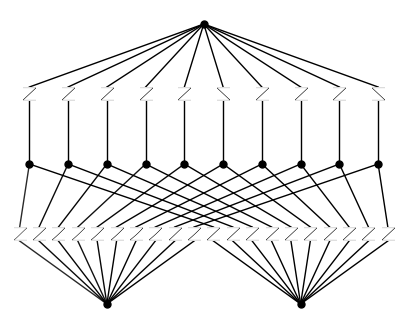

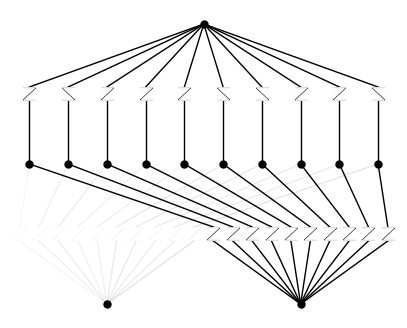

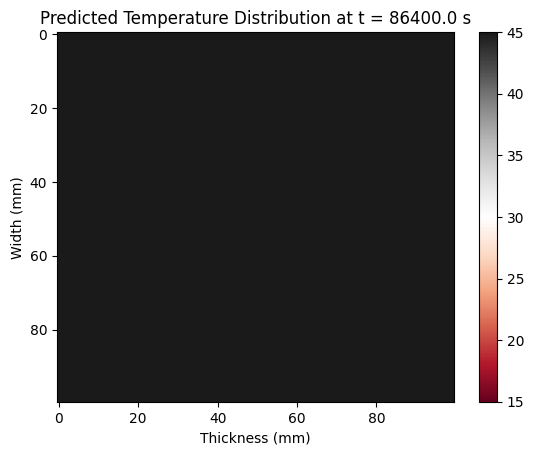

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
from kan import KAN  # Ensure you have the kan module available

# Parameters
L = 0.24  # Wall thickness in meters (240mm)
W = 1.0   # Wall width in meters (1000mm)
alpha = 2.5e-6  # Thermal diffusivity in m^2/s
T0 = 20   # Temperature at x=0 in Celsius
TL = 40   # Temperature at x=L in Celsius
Ti = 25   # Initial average temperature in Celsius

# Time and space grids
x = np.linspace(0, L, 100)  # Space grid along wall thickness
t = np.linspace(0, 3600*24, 200)  # Time grid up to 1 day

# Initialize temperature data storage
TemperatureData = np.zeros((len(t), len(x)))

# Compute temperature distribution
N = 10  # Number of Fourier series terms
for k in range(len(t)):
    Temperature = T0 + (TL - T0) * x / L
    for n in range(1, N+1):
        Bn = 2/(n*np.pi) * ((-1)**n - 1) * (TL - T0 - (Ti - T0)) / L
        Temperature += Bn * np.sin(n * np.pi * x / L) * np.exp(-alpha * (n * np.pi / L)**2 * t[k])
    TemperatureData[k, :] = Temperature

# Create dataset for KAN
x_data = np.array([[x_val, t_val] for t_val in t for x_val in x])
y_data = TemperatureData.flatten()

x_tensor = torch.tensor(x_data, dtype=torch.float32)
y_tensor = torch.tensor(y_data, dtype=torch.float32).unsqueeze(1)

# Split dataset into training and test sets
train_size = int(0.8 * len(x_tensor))
test_size = len(x_tensor) - train_size
train_input, test_input = torch.split(x_tensor, [train_size, test_size])
train_label, test_label = torch.split(y_tensor, [train_size, test_size])

# Create the dataset dictionary as expected by KAN
dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': test_input,
    'test_label': test_label
}

# Initialize KAN with adjusted parameters
model = KAN(width=[2, 10, 1], grid=10, k=3, seed=0)  # Increase hidden neurons and grid size

# Plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

# Function to train KAN with early stopping and learning rate scheduling
def train_with_early_stopping(model, dataset, opt="LBFGS", steps=100, patience=10, initial_lr=0.1, min_lr=1e-5, lr_decay=0.9):
    optimizer = torch.optim.LBFGS(model.parameters(), lr=initial_lr)
    criterion = torch.nn.MSELoss()

    best_loss = float('inf')
    best_model = None
    patience_counter = 0
    current_lr = initial_lr

    for step in range(steps):
        def closure():
            optimizer.zero_grad()
            outputs = model(dataset['train_input'])
            loss = criterion(outputs, dataset['train_label'])
            loss.backward()
            return loss

        loss = optimizer.step(closure).item()

        # Validation step
        with torch.no_grad():
            val_outputs = model(dataset['test_input'])
            val_loss = criterion(val_outputs, dataset['test_label']).item()

        print(f'Step {step + 1}/{steps}, Loss: {loss}, Validation Loss: {val_loss}')

        # Early stopping logic
        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

        # Learning rate scheduling
        if step % patience == 0 and step > 0:
            current_lr = max(min_lr, current_lr * lr_decay)
            for param_group in optimizer.param_groups:
                param_group['lr'] = current_lr

    # Load the best model
    if best_model is not None:
        model.load_state_dict(best_model)

# Train the model with early stopping and learning rate scheduling
train_with_early_stopping(model, dataset, steps=100, patience=10, initial_lr=0.1)

# Plot trained KAN
model.plot()

# Automatically set activation functions to be symbolic
lib = ['x', 'sin', 'exp', 'x^2', 'x^3']
model.auto_symbolic(lib=lib)

# Continue training to almost machine precision
train_with_early_stopping(model, dataset, steps=50, patience=10, initial_lr=0.01)

# Obtain the symbolic formula
symbolic_formula = model.symbolic_formula()[0][0]
print("Discovered Symbolic Formula:")
print(symbolic_formula)

# Create output directory for plots
outputDir = 'TemperaturePlots'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

# Plot predicted temperature distribution
predicted_temperature = model(x_tensor).detach().numpy().reshape(len(t), len(x))

fig, ax = plt.subplots()
cax = ax.imshow(np.tile(predicted_temperature[0, :], (100, 1)), aspect='auto', cmap='RdGy', vmin=15, vmax=45)
fig.colorbar(cax)
ax.set_xlabel('Thickness (mm)')
ax.set_ylabel('Width (mm)')
ax.set_title(f'Predicted Temperature Distribution at t = {t[0]} s')

def update_pred(frame):
    ax.clear()
    cax = ax.imshow(np.tile(predicted_temperature[frame, :], (100, 1)), aspect='auto', cmap='RdGy', vmin=15, vmax=45)
    ax.set_xlabel('Thickness (mm)')
    ax.set_ylabel('Width (mm)')
    ax.set_title(f'Predicted Temperature Distribution at t = {t[frame]} s')

ani_pred = FuncAnimation(fig, update_pred, frames=len(t), repeat=False)
ani_pred.save(f'{outputDir}/PredictedTemperatureAnimation.gif', writer='imagemagick', fps=10)

plt.show()


In [4]:
model.symbolic_formula()[0][0]

-0.05*(-x_1 - 0.91)**2 + 0.01*(-0.15*x_1 - 1)**3 - 0.13*exp(0.98*x_1) + 0.03*exp(1.18*x_1) - 0.03*exp(1.72*x_1) - 0.02*sin(1.78*x_1 - 3.78) + 0.03*sin(2.05*x_1 - 7.01) - 0.05*sin(2.46*x_1 + 8.8) - 0.e-2*sin(3.48*x_1 - 3.59) - 0.02*sin(4.4*x_1 - 9.98) + 0.23